## Import the libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

## Create the dataset

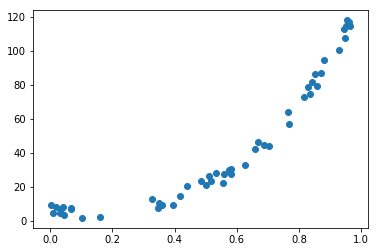

In [502]:
x = np.random.rand(50,1) 
y = (5*x)**3 + 10*np.random.rand(50,1)

plt.scatter(x,y)

## Create the train and test sets

In [503]:
X_train, X_test, y_train, y_test = train_test_split(x, y)

In [504]:
print("X_train shape :" ,X_train.shape)
print("X_test shape :" ,X_test.shape)
print("y _train shape :" ,y_train.shape)
print("y_test shape :" ,y_test.shape)

X_train shape : (37, 1)
X_test shape : (13, 1)
y _train shape : (37, 1)
y_test shape : (13, 1)


## Create the Polynomial Regressor

In [523]:
class PolyRegression : 
    def __init__(self, degree=3) :
        self.degree = degree
    
    def train_gradient_descent(self, X, y, learning_rate=0.01, n_iter=100):
        n_samples, n_features = X.shape
        self.weights = np.zeros(shape=(1,self.degree))
        self.bias = 0
        costs = []
        
        for i in range(n_iter):
            for j in range(self.degree):
                y_predict = np.dot(X**(j+1),self.weights[:,j]) + self.bias
                y_predict = np.expand_dims(y_predict, axis=1)
            
                dJ_dw = (2 / n_samples) * np.dot(X.T, (y_predict - y))
                dJ_db = (2 / n_samples) * np.sum(y_predict - y)
            
                self.weights[:,j] = self.weights[:,j] - learning_rate * dJ_dw
                self.bias = self.bias - learning_rate * dJ_db
            
            cost = 1 / n_samples * np.sum((y - y_predict)**2)
            costs.append(cost)
            
        return self.weights, self.bias, costs
        
    def predict(self, X):
        for j in range(self.degree):
                y_predict = np.dot(X**(j+1),self.weights[:,j]) + self.bias
                y_predict = np.expand_dims(y_predict, axis=1)
        return y_predict
    
    def plot_function(self, X,Y):
        plt.figure(figsize=(8,6))
        x = np.linspace(0,1,200)
        x = np.expand_dims(x, axis=1)
        y = self.predict(x)
        plt.plot(x,y, c='r')
        plt.scatter(X,Y)
        plt.xlabel("First feature")
        plt.ylabel("Second feature")
        plt.show()
                   

## Train the regressor

In [539]:
regressor = PolyRegression()
w_trained, b_trained, costs = regressor.train_gradient_descent(X_train, y_train, learning_rate=0.05, n_iter=1000)

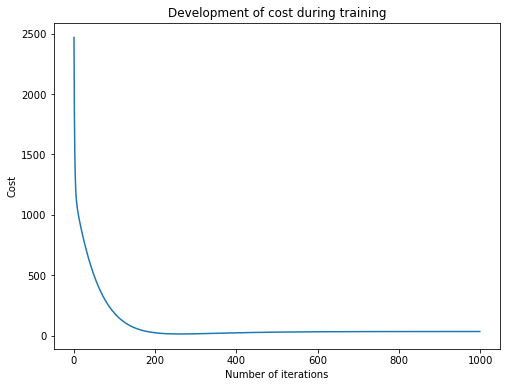

In [540]:
fig = plt.figure(figsize=(8,6))
plt.plot(np.arange(1000), costs)
plt.title("Development of cost during training")
plt.xlabel("Number of iterations")
plt.ylabel("Cost")
plt.show()

## Look at the results

In [541]:
n_samples = X_train.shape[0]
n_samples_test = X_test.shape[0]

y_p_train = regressor.predict(X_train)
y_p_test = regressor.predict(X_test)

In [542]:
error_train =  (1 / n_samples) * np.sum((y_p_train - y_train) ** 2)
error_test =  (1 / n_samples_test) * np.sum((y_p_test - y_test) ** 2)

print(f"Error on training set: {np.round(error_train, 4)}")
print(f"Error on test set: {np.round(error_test,4)}")

Error on training set: 33.2783
Error on test set: 39.0535


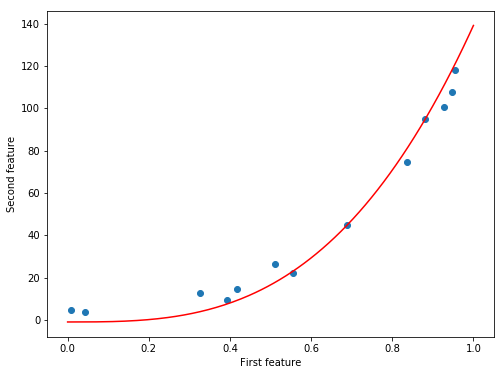

In [543]:
regressor.plot_function(X_test, y_test)